In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
from sklearn.metrics import explained_variance_score
import matplotlib as mpl

In [2]:
gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
gru4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend = true4_dend_na - true4_dend_nona
true4_dend_nona = true4_dend_nona - np.mean(true4_dend_nona, 1).reshape(-1,1)
gru4_nona_subout -= np.mean(gru4_nona_subout, 1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

/tmp/ipykernel_17814/1938468396.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


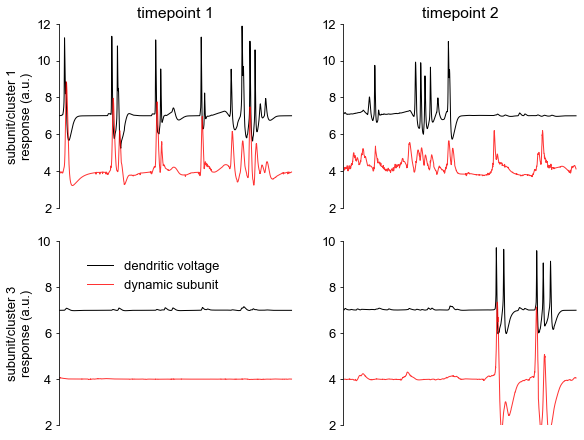

In [8]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (8,6))
gs = fig.add_gridspec(2,2, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ax1.plot(true4_dend[0][17000:20000]/10+7, linewidth=1, color="black", label="dendritic voltage")
ax1.plot(gru4_diff_subout[0][17000:20000]*5+4, linewidth=1, color="red", alpha=0.8, label="dynamic subunit")
ax1.set_ylabel("subunit/cluster 1\nresponse (a.u.)")
ax1.set_title("timepoint 1")
ax1.margins(x=0.005, y=0.005)
ax1.set_ylim(2,12)

ax2.plot(true4_dend[0][22500:25500]/10+7, linewidth=1, color="black")
ax2.plot(gru4_diff_subout[0][22500:25500]*5+4, linewidth=1, color="red", alpha=0.8)
ax2.set_title("timepoint 2")
ax2.margins(x=0.005, y=0.005)
#ax2.set_ylim(-1,11.5)
ax2.set_ylim(2,12)

ax3.plot(true4_dend[2][17000:20000]/10+7, linewidth=1, color="black", label="dendritic voltage")
ax3.plot(gru4_diff_subout[2][17000:20000]*5+4, linewidth=1, color="red", alpha=0.8, label="dynamic subunit")
ax3.legend(loc=(0.1,0.7), frameon=False)
ax3.set_ylabel("subunit/cluster 3\nresponse (a.u.)")
ax3.margins(x=0.005, y=0.005)
#ax3.set_ylim(-0.5,8.5)
ax3.set_ylim(2,10)

ax4.plot(true4_dend[2][22500:25500]/10+7, linewidth=1, color="black")
ax4.plot(gru4_diff_subout[2][22500:25500]*5+4, linewidth=1, color="red", alpha=0.8)
ax4.margins(x=0.005, y=0.005)
ax4.set_ylim(2,10)

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
#ax1.spines.left.set_visible(False)
#ax1.set_yticks([])
ax1.set_xticks([])
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
#ax2.spines.left.set_visible(False)
#ax2.set_yticks([])
ax2.set_xticks([])
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
#ax3.spines.left.set_visible(False)
#ax3.set_yticks([])
ax3.set_xticks([])
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
#ax4.spines.left.set_visible(False)
#ax4.set_yticks([])
ax4.set_xticks([])

fig.tight_layout()
plt.show()